## Low-rank plus sparse trajectory decomposition for direct exoplanet imaging

Simple example of direct exoplanet imaging.


In [1]:
import sys
sys.path.append("/home/daglayansevi/simon_sparse/pynopt/")
import vip_hci as vip
from hciplot import plot_frames
from exoplanet_lrpt import exoplanet_lrpt_annular
import pylops
import numpy as np

### Prepare data

The variable ``dataset`` contains a Betapic of size (612, 100, 100)  where the first dimension is time and the other two are the spatial dimensions.

We subsample the cube to include only every third frame. 

You can find sample datasets from VIP_extras https://github.com/vortex-exoplanet/VIP_extras/tree/master/datasets

In [10]:
adi_cube = '/home/daglayansevi/mc_vip_package/datasets/bpic_naco.fits'#'../../datasets/bpic_naco'
adi_pa = '/home/daglayansevi/mc_vip_package/datasets/bpic_naco.fits'#'../../datasets/bpic_naco'
adi_psf = '/home/daglayansevi/mc_vip_package/datasets/naco_psf.fits'#'../../datasets/naco_psf'

dataset = vip.hci_dataset.Dataset(
    cube=vip.fits.open_fits(adi_cube, verbose=False),
    angles=vip.fits.open_fits(adi_pa, n=1, verbose=False),
    psf=vip.fits.open_fits(adi_psf,verbose=False)
)

dataset.crop_frames(100)
dataset.cube = dataset.cube[0:612:3]
dataset.angles = dataset.angles[0:612:3]

dataset.normalize_psf(verbose=False, size=9)

Cube array shape: (612, 300, 300)
Angles array shape: (612,)
PSF array shape: (39, 39)
New shape: (612, 100, 100)
Normalized PSF array shape: (9, 9)
The attribute `psfn` contains the normalized PSF
`fwhm` attribute set to
4.603


## Apply the algorithm

### Real data

We test the algorithm using ``rank``=25 and ``sparsity``=10

In [11]:
frame_planet, cube_background, all_pixels, opt_log = exoplanet_lrpt_annular(dataset.cube, dataset.angles, dataset.fwhm, inner_rad=0, outer_rad=50, asize=10, r=25, s=10, MAX_ITER=100, psfn = dataset.psfn, normalize = True, lsqr_init=False, verbosity=1)

Terminated - min relative decrease reached after 16 iterations, 8.73 seconds.

Terminated - min relative decrease reached after 16 iterations, 9.02 seconds.

Terminated - min relative decrease reached after 16 iterations, 9.33 seconds.

Terminated - min relative decrease reached after 16 iterations, 9.53 seconds.

Terminated - min relative decrease reached after 16 iterations, 9.97 seconds.



Because the planet on beta-pictoris data set is known, we know that it is on (62,62). 

Our algorithm can detect the planet.

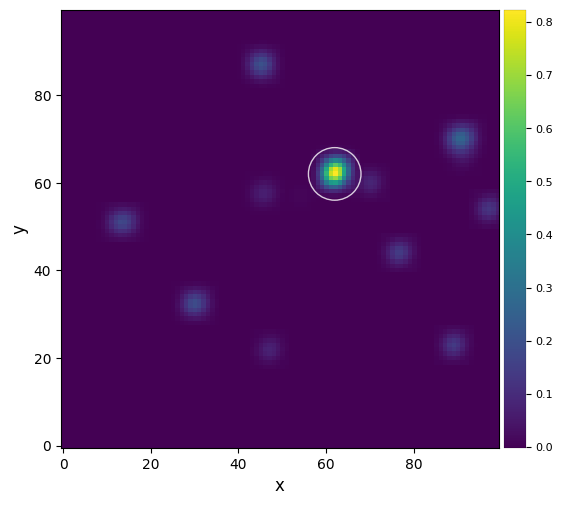

In [12]:
plot_frames(frame_planet, circle=(62,62))

### Synthetic planet

Let's inject synthetic planet to the dataset with flux $1.5\sigma_{ann}$ at $3\lambda/D$

Cube array shape: (612, 300, 300)
Angles array shape: (612,)
PSF array shape: (39, 39)
Normalized PSF array shape: (21, 21)
The attribute `psfn` contains the normalized PSF
`fwhm` attribute set to
4.801
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-03-14 01:59:11
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
`subi_size` is odd (while frame size is even)
Setting `subi_size` to 6 pixels
2d gauss-fitting
Running time:  0:00:15.620474
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
New shape: (612, 100, 100)
Branch 1:
	(X,Y)=(36.47, 54.93) at 0.39 arcsec (14.40 pxs from center)


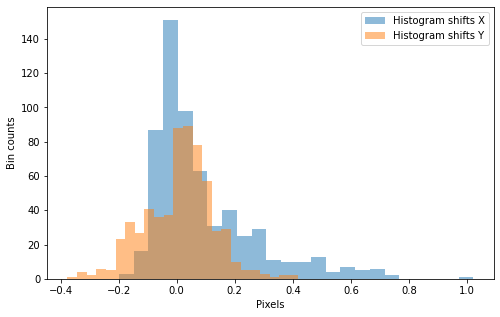

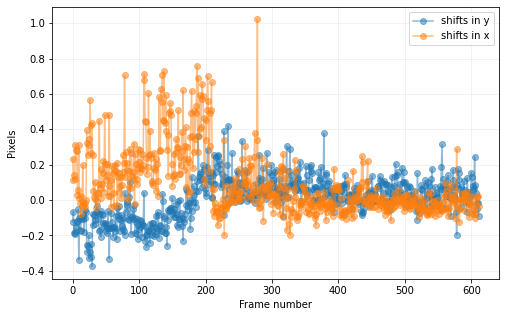

In [4]:
adi_cube = '/home/daglayansevi/mc_vip_package/datasets/bpic_naco_empty.fits'#'../../datasets/bpic_naco'
adi_pa = '/home/daglayansevi/mc_vip_package/datasets/bpic_naco.fits'#'../../datasets/bpic_naco'
adi_psf = '/home/daglayansevi/mc_vip_package/datasets/naco_psf.fits'#'../../datasets/naco_psf'

dataset = vip.hci_dataset.Dataset(
    cube=vip.fits.open_fits(adi_cube, verbose=False),
    angles=vip.fits.open_fits(adi_cube, n=1, verbose=False),
    psf=vip.fits.open_fits(adi_psf,verbose=False)
)    
dataset.normalize_psf(verbose=False, size=21)
dataset.planets = []
dataset.px_scale = 0.
dataset.angles = -dataset.angles
dataset.recenter(negative=True, plot=False)

from vip_hci.fm.fakecomp import cube_inject_companions
dataset.crop_frames(100)
dataset.cube = dataset.cube[0:612:3]
dataset.angles = dataset.angles[0:612:3]

flux = 71.201675*1.5
cubefc, location = cube_inject_companions(dataset.cube, dataset.psfn, dataset.angles, flevel=flux, rad_dists=3*dataset.fwhm, plsc=0.02727, n_branches = 1, theta = 160, verbose=True, full_output=True)


We test the algorithm using ``rank``=10 and ``sparsity``=10

In [5]:
r=10
s=10
cube_planet, cube_background, all_pixels, opt_log = exoplanet_lrpt_annular(cubefc, dataset.angles, dataset.fwhm, inner_rad=10, outer_rad=50, asize=10, r=r, s=s, MAX_ITER=100, psfn = dataset.psfn, normalize = True, lsqr_init=False, verbosity=1)


Terminated - min relative decrease reached after 16 iterations, 8.99 seconds.

Terminated - min relative decrease reached after 16 iterations, 9.33 seconds.

Terminated - min relative decrease reached after 16 iterations, 9.68 seconds.

Terminated - min relative decrease reached after 16 iterations, 9.90 seconds.



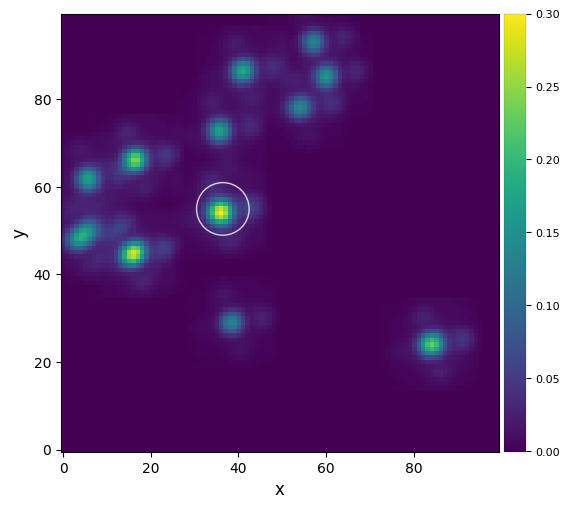

In [6]:
plot_frames((cube_planet), circle=(location[0][1], location[0][0]), vmax=0.3)